In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Supervisor/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-14 torch 1.8.1+cu102 CUDA:0 (GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [4]:
img = '1.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 2560x1920 1 person
Speed: 2061.4ms pre-process, 48522.1ms inference, 3302.6ms NMS per image at shape (1, 3, 640, 480)


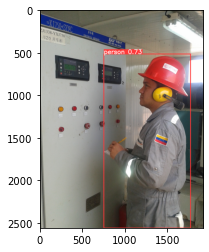

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[109, 102,  86],
         [113, 107,  93],
         [117, 113, 101],
         ...,
         [123, 123, 113],
         [123, 123, 113],
         [124, 124, 114]],
 
        [[111, 104,  86],
         [118, 112,  96],
         [117, 113, 101],
         ...,
         [122, 122, 112],
         [122, 122, 112],
         [122, 122, 112]],
 
        [[117, 110,  92],
         [127, 120, 102],
         [123, 117, 101],
         ...,
         [123, 120, 113],
         [120, 120, 112],
         [122, 122, 114]],
 
        ...,
 
        [[103, 101,  88],
         [103, 101,  88],
         [104, 100,  88],
         ...,
         [ 92,  86,  72],
         [ 93,  90,  75],
         [ 94,  91,  76]],
 
        [[105, 103,  90],
         [107, 105,  92],
         [105, 101,  89],
         ...,
         [ 95,  89,  73],
         [ 95,  92,  75],
         [ 95,  92,  75]],
 
        [[106, 104,  91],
         [107, 105,  92],
         [103,  99,  88],
         ...,
         [ 96,  90,  74],
  

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #hago las detecciones
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Entrenamiento de Yolov5

In [11]:
import uuid  
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['Despierto', 'Dormido']
number_imgs = 20

In [12]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Usamos LabelImg para etiquetar nuestro dataset

In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
Updating files:  21% (23/107)
Updating files:  22% (24/107)
Updating files:  23% (25/107)
Updating files:  24% (26/107)
Updating files:  25% (27/107)
Updating files:  26% (28/107)
Updating files:  27% (29/107)
Updating files:  28% (30/107)
Updating files:  29% (32/107)
Updating files:  30% (33/107)
Updating files:  31% (34/107)
Updating files:  32% (35/107)
Updating files:  33% (36/107)
Updating files:  34% (37/107)
Updating files:  35% (38/107)
Updating files:  36% (39/107)
Updating files:  37% (40/107)
Updating files:  38% (41/107)
Updating files:  39% (42/107)
Updating files:  40% (43/107)
Updating files:  41% (44/107)
Updating files:  42% (45/107)
Updating files:  43% (47/107)
Updating files:  44% (48/107)
Updating files:  45% (49/107)
Updating files:  46% (50/107)
Updating files:  47% (51/107)
Updating files:  48% (52/107)
Updating files:  49% (53/107)
Updating files:  50% (54/107)
Updating files:  51% (55/107)
Updating files:  52% (56/107)
Updating file

In [14]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Entrenamiento del modelo

In [ ]:
!python train.py --img 320 --batch 16 --epochs 30 --data dataset.yml --weights yolov5s.pt --workers 2

In [16]:
!pip install tensorboard

  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached google_auth-2.3.3-py2.py3-none-any.whl (155 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Werkzeug-2.0.2-py3-none-any.whl (288 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


# Cargar el modelo

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp3/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Supervisor/.cache\torch\hub\master.zip
YOLOv5  2021-12-14 torch 1.8.1+cu102 CUDA:0 (GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [12]:
img = os.path.join('data', 'images', 'Dormido.44b06874-5bae-11ec-bad0-089798c311f5.jpg')

In [13]:
results = model(img)

In [14]:
results.print()

image 1/1: 480x640 1 Dormido
Speed: 562.6ms pre-process, 26.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


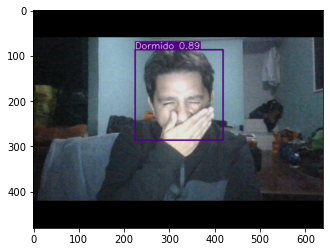

In [15]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()